In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


In [5]:
# Escalado de las variables
# ==============================================================================
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794


In [7]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.iloc[:4,:4]

------------------
Distancia euclídea
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN
Arkansas,1.302905,2.854730,2.74535,NaN


In [9]:
# Top n observaciones más similares
# ==============================================================================
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(3)

,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.207944
631,New York,Illinois,0.353774
665,Kansas,Indiana,0.433124


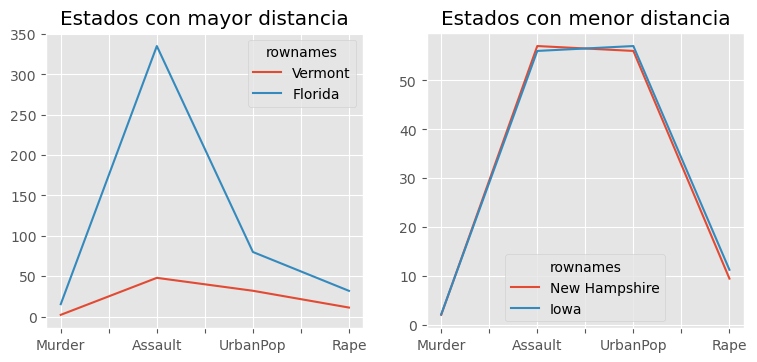

In [11]:
# Estados con mayor y menor distancia
# ==============================================================================
fig, axs = plt.subplots(1,2, figsize=(9, 3.84))
datos.loc[['Vermont', 'Florida']].transpose().plot(ax= axs[0])
axs[0].set_title('Estados con mayor distancia')
datos.loc[['New Hampshire', 'Iowa']].transpose().plot(ax= axs[1])
axs[1].set_title('Estados con menor distancia');